In [1]:
%pylab inline 
import seaborn as sns
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
import scipy.odr # fitting
from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
h = 0.697
xdatamin = 0
ydatamin = 1e6
cdatamin = 1e9
ddatamin = 1e6
dtot_bul = 0.3

In [4]:
# read data (bulge)
# redshift should be a string: e.g. '08'

def read_data( redshift ):
    
    PATH = '../Rockstar_' + redshift + '/new_concatenate_data/finalconcatenatedata/'

    x = np.load( PATH + 'sigmabulgestars.npy' )
#     x = np.load( PATH + 'sigmahalfmass.npy' )
    y = np.load( PATH + 'blackholemass.npy' )/h
    c = np.load( PATH + 'bulgemass.npy' )/h
#     c = np.load( PATH + 'stellarmass.npy' )/h
    d = np.load( PATH + 'blackholemass.npy' )/h
    k = np.load( PATH + 'dtotratio.npy' )
    
    return x, y, c, d, k

# Is there a better way to do this? 
e.g. to initialize a multiple dimension np.array without a specific length?

In [5]:
x08, y08, c08, d08, k08 = read_data( '08' ) # structure array
x09, y09, c09, d09, k09 = read_data( '09' )
x10, y10, c10, d10, k10 = read_data( '10' )

In [6]:
# read data (total and hm)
# redshift should be a string: e.g. '08'

def read_data_tot( redshift ):
    
    PATH = '../Rockstar_' + redshift + '/new_concatenate_data/finalconcatenatedata/'

    x = np.load( PATH + 'sigmahalfmass.npy' )
    y = np.load( PATH + 'blackholemass.npy' )/h
    c = np.load( PATH + 'stellarmass.npy' )/h
    d = np.load( PATH + 'blackholemass.npy' )/h        
    k = np.load( PATH + 'dtotratio.npy' )
    
    return x, y, c, d, k

In [7]:
xt08, yt08, ct08, dt08, kt08 = read_data_tot( '08' )
xt09, yt09, ct09, dt09, kt09 = read_data_tot( '09' )
xt10, yt10, ct10, dt10, kt10 = read_data_tot( '10' )

# Is this a good way to select np.array by mask array?

In [8]:
# data selecting function

def get_data_higher(con_val,conmin,c,d,x,y,k):
    
    con = con_val > conmin
    cc = c[con]
    dd = d[con] 
    xx = x[con]
    yy = y[con] 
    kk = k[con] 
    
    return cc,dd,xx,yy,kk

In [9]:
# Select data at z=08
ct08,dt08,xt08,yt08,kt08 = get_data_higher(ct08,cdatamin,ct08,dt08,xt08,yt08,kt08)
print(len(ct08))
ct08,dt08,xt08,yt08,kt08 = get_data_higher(dt08,ddatamin,ct08,dt08,xt08,yt08,kt08)
print(len(ct08))

8727
8131


In [10]:
# Select data at z=08
c08,d08,x08,y08,k08 = get_data_higher(c08,cdatamin,c08,d08,x08,y08,k08)
print(len(c08))
c08,d08,x08,y08,k08 = get_data_higher(d08,ddatamin,c08,d08,x08,y08,k08)
print(len(c08))
c08,d08,x08,y08,k08 = get_data_higher((1.-k08),(1.-dtot_bul),c08,d08,x08,y08,k08)
print(len(c08))

4950
4741
3227


In [11]:
# Select data at z=09
ct09,dt09,xt09,yt09,kt09 = get_data_higher(ct09,cdatamin,ct09,dt09,xt09,yt09,kt09)
print(len(ct09))
ct09,dt09,xt09,yt09,kt09 = get_data_higher(dt09,ddatamin,ct09,dt09,xt09,yt09,kt09)
print(len(ct09))

1659
1567


In [12]:
# Select data at z=09
c09,d09,x09,y09,k09 = get_data_higher(c09,cdatamin,c09,d09,x09,y09,k09)
print(len(c09))
c09,d09,x09,y09,k09 = get_data_higher(d09,ddatamin,c09,d09,x09,y09,k09)
print(len(c09))
c09,d09,x09,y09,k09 = get_data_higher((1.-k09),(1.-dtot_bul),c09,d09,x09,y09,k09)
print(len(c09))

909
886
624


In [13]:
# Select data at z=10
ct10,dt10,xt10,yt10,kt10 = get_data_higher(ct10,cdatamin,ct10,dt10,xt10,yt10,kt10)
print(len(ct10))
ct10,dt10,xt10,yt10,kt10 = get_data_higher(dt10,ddatamin,ct10,dt10,xt10,yt10,kt10)
print(len(ct10))

280
269


In [14]:
# Select data at z=10
c10,d10,x10,y10,k10 = get_data_higher(c10,cdatamin,c10,d10,x10,y10,k10)
print(len(c10))
c10,d10,x10,y10,k10 = get_data_higher(d10,ddatamin,c10,d10,x10,y10,k10)
print(len(c10))
c10,d10,x10,y10,k10 = get_data_higher((1.-k10),(1.-dtot_bul),c10,d10,x10,y10,k10)
print(len(c10))

153
150
113


In [15]:
def convert_log10(x,y,c,d):
    x = np.log10(x)
    y = np.log10(y)
    c = np.log10(c)
    d = np.log10(d)
    return x, y, c, d

In [16]:
# Convert into log scale

x08, y08, c08, d08 = convert_log10(x08, y08, c08, d08)
x09, y09, c09, d09 = convert_log10(x09, y09, c09, d09)
x10, y10, c10, d10 = convert_log10(x10, y10, c10, d10)

xt08, yt08, ct08, dt08 = convert_log10(xt08, yt08, ct08, dt08)
xt09, yt09, ct09, dt09 = convert_log10(xt09, yt09, ct09, dt09)
xt10, yt10, ct10, dt10 = convert_log10(xt10, yt10, ct10, dt10)

In [17]:
# Fitting function
def f(B, x):
    return B[0]*x + B[1]

In [18]:
# Intrinsic scatter calculating function
# x0 is 200. for sigma and 1e11 for stellar mass
# a is the slope, b is the intersection

def get_intrinsic( xi, yi, x0, a, b, intrinsic_guess ):
    
    dof  = len(xi) - 2.
    chi2 = ( yi - (a*xi + b) )**2
    erry = 0.0
    errx = 0.0

    func = lambda intrinsic2 : dof - np.sum( chi2/( intrinsic2 + erry**2 + (a*errx)**2 ) )
    
    intrinsic2 = fsolve(func, intrinsic_guess**2)
    intrinsic2 = np.abs(intrinsic2)
    
    return np.sqrt(intrinsic2)

In [19]:
def get_rms( xi, yi, a, b ):
        
    dof = len(xi) - 2.
    rms = np.sqrt( np.sum( ( yi - (a*xi + b) )**2/dof ) )

    return rms

In [20]:
# show fitting results

def perform_fit( x, y, x0, intrinsic_guess, beta_guess ):

    linear = scipy.odr.Model(f)
    mydata = scipy.odr.Data(x, y)
    myodr = scipy.odr.ODR(mydata, linear, beta0=beta_guess)
    myoutput = myodr.run()
#     myoutput.pprint()

    a_fit = myoutput.beta[0]
    b_fit = myoutput.beta[1]
    
    alpha = b_fit + a_fit*np.log10(x0) 
    
    err_al = 0.5*myoutput.sd_beta[1]
    err_be = 0.5*myoutput.sd_beta[0]

    intrinsic = get_intrinsic( x, y, x0, a_fit, b_fit, intrinsic_guess )
    
    rms = get_rms( x, y, a_fit, b_fit )

    print('alpha: %2.2f +- %2.2f' %(alpha,err_al), 
          'beta: %2.2f +- %2.2f' %(a_fit,err_be), 
          'intrinsic: %2.2f' %intrinsic, 
          'rms_err: %2.2f' %rms)
    
    return a_fit, b_fit, err_be, err_al, intrinsic

In [21]:
sigma = 10**x08
sigma_mean = np.mean(sigma)
std = np.sqrt( np.mean( (sigma-sigma_mean)**2 ) )
print(10**x08)
print(np.mean(10**x08))
print(std)
print(np.mean(std/sigma))

[ 94.53971359 108.67822307 222.36680032 ...  64.17864137  71.19833638
  69.33377875]
90.00911605547934
18.543569166683447
0.21312632758201092


In [22]:
sigma = x08
sigma_mean = np.mean(sigma)
std = np.sqrt( np.mean( (sigma-sigma_mean)**2 ) )
print(x08)
print(np.mean(x08))
print(std)
print(np.mean(std/sigma))

[1.97561428 2.03614253 2.34706995 ... 1.80739052 1.85246985 1.84094487]
1.9464358744667756
0.0798086622525782
0.041068825018748645


In [23]:
sigma = x08 - np.log10(200.)
sigma_mean = np.mean(sigma)
std = np.sqrt( np.mean( (sigma-sigma_mean)**2 ) )
print(x08)
print(np.mean(x08))
print(std)
print(np.mean(std/sigma))

[1.97561428 2.03614253 2.34706995 ... 1.80739052 1.85246985 1.84094487]
1.9464358744667756
0.0798086622525782
-0.24047610856819715


In [24]:
# Fit: MM (bulge)
x0 = 1e11
intrinsic_guess = 0.2
beta_guess = [1., -4.6]

print('MM at z=08:')
p_fit08, q_fit08, p_err08, q_err08, pq_in08 = perform_fit( c08, d08, x0, intrinsic_guess, beta_guess )
print('MM at z=09:')
p_fit09, q_fit09, p_err09, q_err09, pq_in09 = perform_fit( c09, d09, x0, intrinsic_guess, beta_guess )
print('MM at z=10:')
p_fit10, q_fit10, p_err10, q_err10, pq_in10 = perform_fit( c10, d10, x0, intrinsic_guess, beta_guess )

MM at z=08:
('alpha: 8.43 +- 0.06', 'beta: 1.16 +- 0.01', 'intrinsic: 0.15', 'rms_err: 0.15')
MM at z=09:
('alpha: 8.61 +- 0.14', 'beta: 1.24 +- 0.02', 'intrinsic: 0.15', 'rms_err: 0.15')
MM at z=10:
('alpha: 8.98 +- 0.37', 'beta: 1.43 +- 0.04', 'intrinsic: 0.14', 'rms_err: 0.14')


In [25]:
# Fit: MM (total)
x0 = 1e11
intrinsic_guess = 0.2
beta_guess = [1., -4.6]

print('MM at z=08:')
pt_fit08, qt_fit08, pt_err08, qt_err08, pqt_in08 = perform_fit( ct08, dt08, x0, intrinsic_guess, beta_guess )
print('MM at z=09:')
pt_fit09, qt_fit09, pt_err09, qt_err09, pqt_in09 = perform_fit( ct09, dt09, x0, intrinsic_guess, beta_guess )
print('MM at z=10:')
pt_fit10, qt_fit10, pt_err10, qt_err10, pqt_in10 = perform_fit( ct10, dt10, x0, intrinsic_guess, beta_guess )

MM at z=08:
('alpha: 8.25 +- 0.03', 'beta: 1.10 +- 0.00', 'intrinsic: 0.14', 'rms_err: 0.14')
MM at z=09:
('alpha: 8.44 +- 0.08', 'beta: 1.19 +- 0.01', 'intrinsic: 0.14', 'rms_err: 0.14')
MM at z=10:
('alpha: 8.76 +- 0.20', 'beta: 1.35 +- 0.02', 'intrinsic: 0.13', 'rms_err: 0.13')


Error in callback <function post_execute at 0x2b8a268c1410> (for post_execute):


RuntimeError: LaTeX was not able to process the following string:
'epsilon_0'

Here is the full report generated by LaTeX:
This is pdfTeXk, Version 3.141592-1.40.3 (Web2C 7.5.6)
 %&-line parsing enabled.
entering extended mode
(./a177a74b528e6095b649d048fefb5ac6.tex
LaTeX2e <2005/12/01>
Babel <v3.8h> and hyphenation patterns for english, usenglishmax, dumylang, noh
yphenation, arabic, basque, bulgarian, coptic, welsh, czech, slovak, german, ng
erman, danish, esperanto, spanish, catalan, galician, estonian, farsi, finnish,
 french, greek, monogreek, ancientgreek, croatian, hungarian, interlingua, ibyc
us, indonesian, icelandic, italian, latin, mongolian, dutch, norsk, polish, por
tuguese, pinyin, romanian, russian, slovenian, uppersorbian, serbian, swedish, 
turkish, ukenglish, ukrainian, loaded.
(/usr/share/texmf/tex/latex/base/article.cls
Document Class: article 2005/09/16 v1.4f Standard LaTeX document class
(/usr/share/texmf/tex/latex/base/size10.clo))
(/usr/share/texmf/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/psnfss/helvet.sty
(/usr/share/texmf/tex/latex/graphics/keyval.sty))
(/usr/share/texmf/tex/latex/base/textcomp.sty
(/usr/share/texmf/tex/latex/base/ts1enc.def))
(/usr/share/texmf/tex/latex/geometry/geometry.sty

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file a177a74b528e6095b649d048fefb5ac6.aux.
(/usr/share/texmf/tex/latex/base/ts1cmr.fd)
(/usr/share/texmf/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.12 ...e{12.000000}{15.000000}{\sffamily epsilon_
                                                  0}
! Extra }, or forgotten $.
l.12 ...12.000000}{15.000000}{\sffamily epsilon_0}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./a177a74b528e6095b649d048fefb5ac6.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on a177a74b528e6095b649d048fefb5ac6.dvi (1 page, 260 bytes).
Transcript written on a177a74b528e6095b649d048fefb5ac6.log.
 



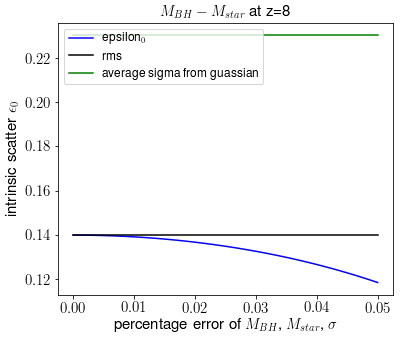

In [26]:
err  = linspace(0,0.05)
eps0 = np.sqrt( 0.14**2 - err**2 - (1.10*err)**2 )
plot( err, eps0,'b',label='epsilon_0' )

plot(err,0.14*eps0/eps0,'k',label='rms')
plot(err,0.23*eps0/eps0,'g',label='average sigma from guassian')

plt.xlabel(r'percentage error of $M_{BH}$, $M_{star}$, $\sigma$', fontsize=15)
plt.ylabel(r'intrinsic scatter $\epsilon_0$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$M_{BH}-M_{star}$ at z=8', fontsize=15)
plt.legend(loc=2,fontsize=12)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 5, forward=True)

In [27]:
# Fit: MS (bulge)
x0 = 200.
intrinsic_guess = 0.2
beta_guess = [5.6, -4.6]

print('MS at z=08:')
a_fit08, b_fit08, a_err08, b_err08, ab_in08 = perform_fit( x08, y08, x0, intrinsic_guess, beta_guess )
print('MS at z=09:')
a_fit09, b_fit09, a_err09, b_err09, ab_in09 = perform_fit( x09, y09, x0, intrinsic_guess, beta_guess )
print('MS at z=10:')
a_fit10, b_fit10, a_err10, b_err10, ab_in10 = perform_fit( x10, y10, x0, intrinsic_guess, beta_guess )

MS at z=08:
('alpha: 8.60 +- 0.17', 'beta: 6.15 +- 0.09', 'intrinsic: 0.42', 'rms_err: 0.42')
MS at z=09:
('alpha: 8.63 +- 0.47', 'beta: 6.56 +- 0.24', 'intrinsic: 0.46', 'rms_err: 0.46')
MS at z=10:
('alpha: 8.73 +- 1.24', 'beta: 6.95 +- 0.63', 'intrinsic: 0.46', 'rms_err: 0.46')


In [28]:
# Fit: MS (hm)
x0 = 200.
intrinsic_guess = 0.2
beta_guess = [5.6, -4.6]

print('MS at z=08:')
at_fit08, bt_fit08, at_err08, bt_err08, abt_in08 = perform_fit( xt08, yt08, x0, intrinsic_guess, beta_guess )
print('MS at z=09:')
at_fit09, bt_fit09, at_err09, bt_err09, abt_in09 = perform_fit( xt09, yt09, x0, intrinsic_guess, beta_guess )
print('MS at z=10:')
at_fit10, bt_fit10, at_err10, bt_err10, abt_in10 = perform_fit( xt10, yt10, x0, intrinsic_guess, beta_guess )

MS at z=08:
('alpha: 8.35 +- 0.08', 'beta: 5.31 +- 0.04', 'intrinsic: 0.36', 'rms_err: 0.36')
MS at z=09:
('alpha: 8.50 +- 0.23', 'beta: 5.95 +- 0.12', 'intrinsic: 0.40', 'rms_err: 0.40')
MS at z=10:
('alpha: 8.49 +- 0.54', 'beta: 6.06 +- 0.28', 'intrinsic: 0.40', 'rms_err: 0.40')


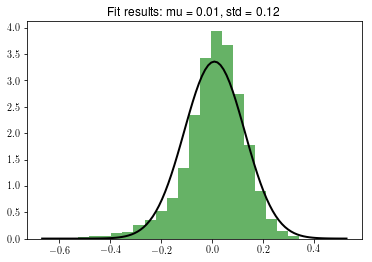

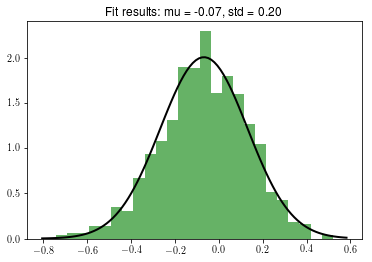

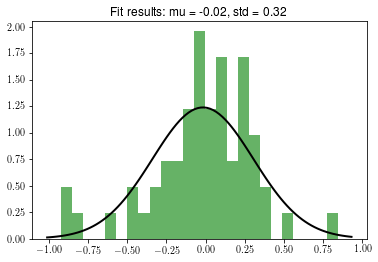

In [29]:
from scipy.stats import norm

nbin = 4
bins = linspace( min(ct08), max(ct08), nbin )
inds = np.digitize(ct08, bins)

for u in range(1,max(inds)):
    
    con = inds==u
    
    new_ct08 = ct08[con]
    new_dt08 = dt08[con]
    
    data = new_dt08 - (pt_fit08*new_ct08 + qt_fit08)
    
    # Plot the histogram.
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, bins=25, alpha=0.6, color='g',normed=1)
    
#     coe = hist(data, bins=25, alpha=0.6, color='g',normed=1)

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)
        
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    
#     print diff(coe[1])[0]
#     print sum(p)
    
    plt.show()

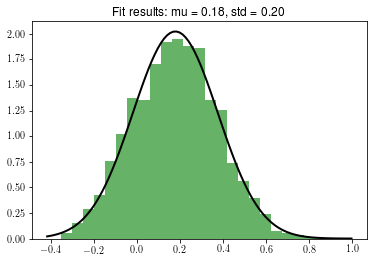

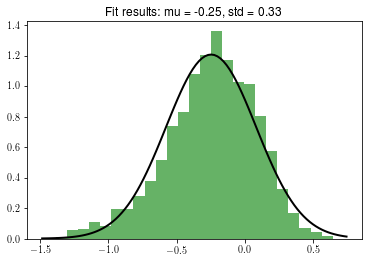

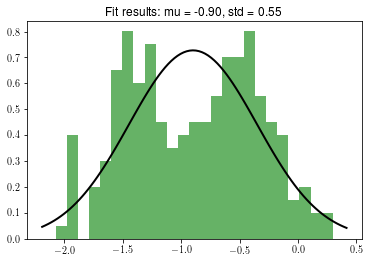

In [30]:
from scipy.stats import norm

nbin = 4
bins = linspace( min(xt08), max(xt08), nbin )
inds = np.digitize(xt08, bins)

for u in range(1,max(inds)):
    
    con = inds==u
    
    new_xt08 = xt08[con]
    new_yt08 = yt08[con]
    
    data = new_yt08 - (at_fit08*new_xt08 + bt_fit08)
    
    # Plot the histogram.
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, bins=25, alpha=0.6, color='g',normed=1)
    
#     coe = hist(data, bins=25, alpha=0.6, color='g',normed=1)

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)
        
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    
#     print diff(coe[1])[0]
#     print sum(p)
    
    plt.show()

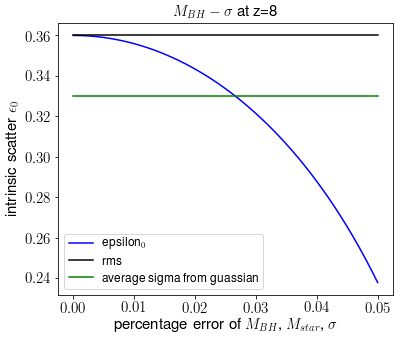

In [31]:
err  = linspace(0,0.05)
eps0 = np.sqrt( 0.36**2 - err**2 - (5.31*err)**2 )
plot( err, eps0,'b',label='epsilon_0' )

plot(err,0.36*eps0/eps0,'k',label='rms')
plot(err,0.33*eps0/eps0,'g',label='average sigma from guassian')

plt.xlabel(r'percentage error of $M_{BH}$, $M_{star}$, $\sigma$', fontsize=15)
plt.ylabel(r'intrinsic scatter $\epsilon_0$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$M_{BH}-\sigma$ at z=8', fontsize=15)
fig = matplotlib.pyplot.gcf()
plt.legend(loc=3,fontsize=12)
fig.set_size_inches(6, 5, forward=True)

# Is there a better/shorter way to make plots?

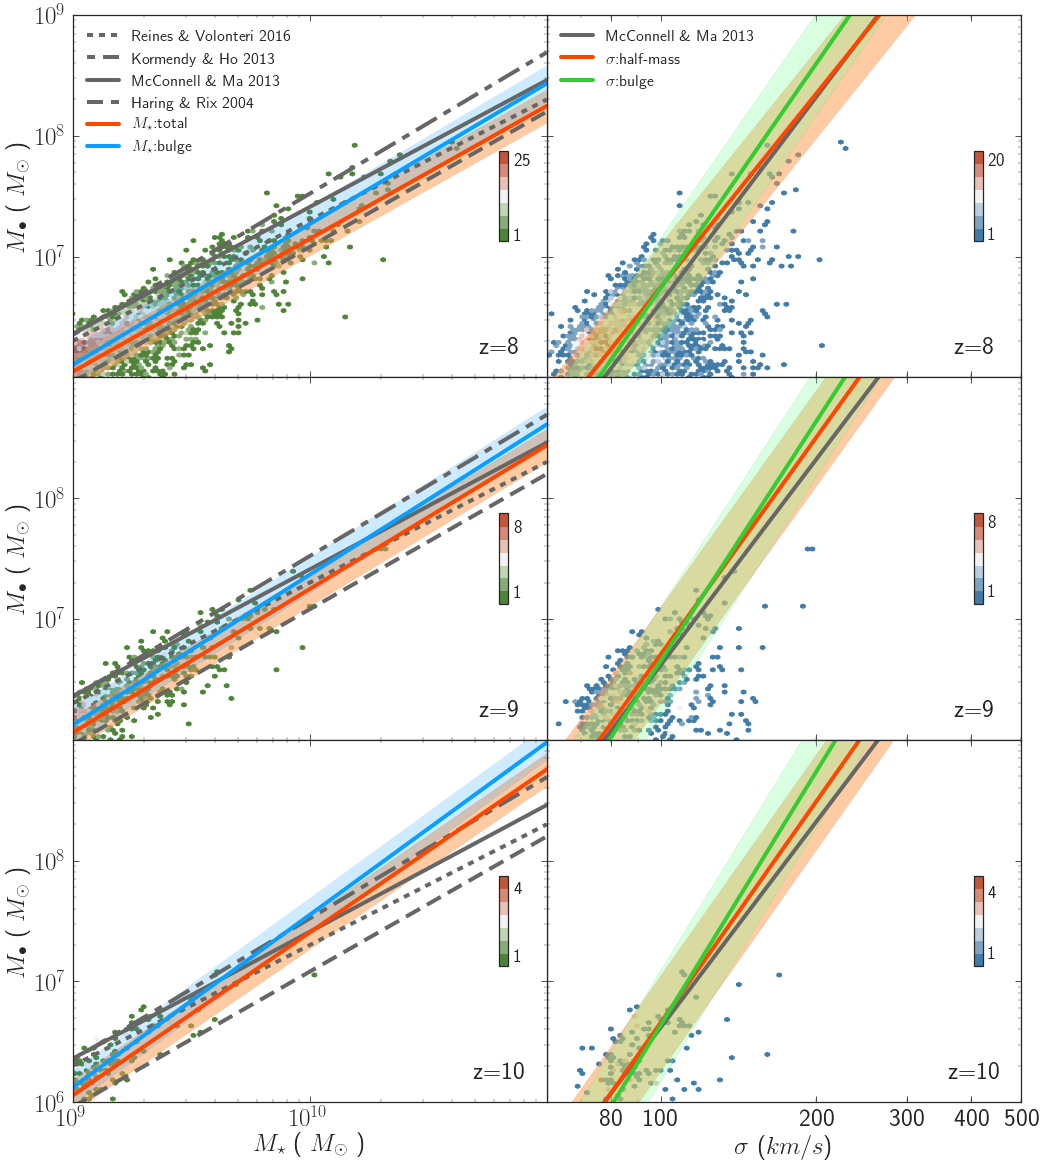

In [35]:
# Plot range 
# --------------------------------------------------------------------------------
xaxmin = 60
xaxmax = 500
yaxmin = 1e6
yaxmax = 1e9
caxmin = 1e9
caxmax = 1e11
daxmin = 1e6
daxmax = 1e9

xx = np.linspace( xaxmin, xaxmax )
cc = np.linspace( caxmin, caxmax )
# --------------------------------------------------------------------------------


# Plot background color settings
# --------------------------------------------------------------------------------
my_pa1 = sns.diverging_palette(120, 20, n=7)
sns.set_palette( my_pa1, sns.set_style("white"), sns.set_context("paper"), sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"}) )
my_cmap1 = ListedColormap(my_pa1)

my_pa2 = sns.diverging_palette(240, 20, n=7)
sns.set_palette( my_pa2, sns.set_style("white"), sns.set_context("paper"), sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"}) )
my_cmap2 = ListedColormap(my_pa2)
# --------------------------------------------------------------------------------


# Plot color and line settings
# --------------------------------------------------------------------------------
obs_color = (0.4,0.4,0.4)
# obs_color  = 'black'
# fit_color1 = 'deepskyblue'
# fit_color2 = 'limegreen'
fit_color1 = '#099FFF'
fit_color2 = 'limegreen'
fit_color3 = 'orangered'
line_w=4.0
legsiz=16
cbfontsize=18
titlefontsize = 25
labelfontsize = 25
ticksize = 25
# --------------------------------------------------------------------------------


gs = gridspec.GridSpec(3, 2, width_ratios=[1,1])


# Right Column
# --------------------------------------------------------------------------------
plt.subplot(gs[1])
plt.hexbin( 10**x08, 10**y08, cmap=my_cmap2, bins='log', xscale='log', yscale='log', extent=[ np.log10(xaxmin), np.log10(xaxmax), np.log10(yaxmin), np.log10(yaxmax) ], mincnt=1 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.4,1.3] )
cb.ax.tick_params(labelsize=cbfontsize)
cb.set_ticklabels( ['1','20'] )
plt.xticks([80,100,200,300,400],[80,100,200,300,400], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8], fontsize=ticksize)
plt.tick_params( which='both', top='on', right='on')
# plt.xlabel( '$\sigma$ (km/s)', fontsize=labelfontsize )
# plt.ylabel( '$ M_{BH} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**8.32)*(xx/200)**5.64 ), '-', color = obs_color, linewidth=line_w, label='McConnell \& Ma 2013' )
plt.fill_between( xx, ( (10**(bt_fit08-abt_in08))*xx**at_fit08 ), ( (10**(bt_fit08+abt_in08))*xx**at_fit08 ), 
                alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848' )
plt.fill_between( xx, ( (10**(b_fit08-ab_in08))*xx**a_fit08 ), ( (10**(b_fit08+ab_in08))*xx**a_fit08 ), 
                alpha=0.3, edgecolor='#3F7F4C', facecolor='#7EFF99' )
plot( xx, ( (10**bt_fit08)*xx**at_fit08 ), '-', color = fit_color3, linewidth=line_w, label='$\sigma$:half-mass' )
plot( xx, ( (10**b_fit08)*xx**a_fit08 ), '-', color = fit_color2, linewidth=line_w, label='$\sigma$:bulge' )
plt.legend( loc=2, prop={'size':legsiz }, frameon=False )

plt.subplot(gs[3])
plt.hexbin( 10**x09, 10**y09, cmap=my_cmap2, bins='log', xscale='log', yscale='log', extent=[ np.log10(xaxmin), np.log10(xaxmax), np.log10(yaxmin), np.log10(yaxmax) ], mincnt=1 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.4,0.9] )
cb.ax.tick_params(labelsize=cbfontsize)
cb.set_ticklabels( ['1','8'] )
plt.xticks([80,100,200,300,400],[80,100,200,300,400], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8], fontsize=ticksize)
plt.tick_params( which='both', top='on', right='on')
# plt.xlabel( '$\sigma$ (km/s)', fontsize=labelfontsize )
# plt.ylabel( '$ M_{BH} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=9', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**8.32)*(xx/200)**5.64 ), '-', color = obs_color, linewidth=line_w )
plt.fill_between( xx, ( (10**(bt_fit09-abt_in09))*xx**at_fit09 ), ( (10**(bt_fit09+abt_in09))*xx**at_fit09 ), 
                alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848' )
plt.fill_between( xx, ( (10**(b_fit09-ab_in09))*xx**a_fit09 ), ( (10**(b_fit09+ab_in09))*xx**a_fit09 ), 
                alpha=0.3, edgecolor='#3F7F4C', facecolor='#7EFF99' )
plot( xx, ( (10**bt_fit09)*xx**at_fit09 ), '-', color = fit_color3, linewidth=line_w )
plot( xx, ( (10**b_fit09)*xx**a_fit09 ), '-', color = fit_color2, linewidth=line_w )
# plt.legend( loc=2, prop={'size':legsiz }, frameon=False )


plt.subplot(gs[5])
plt.hexbin( 10**x10, 10**y10, cmap=my_cmap2, bins='log', xscale='log', yscale='log', extent=[ np.log10(xaxmin), np.log10(xaxmax), np.log10(yaxmin), np.log10(yaxmax) ], mincnt=1 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.35, 0.55] )
cb.ax.tick_params(labelsize=cbfontsize)
cb.set_ticklabels( ['1','4'] )
plt.xticks([80,100,200,300,400,500],[80,100,200,300,400,500], fontsize=ticksize)
plt.yticks([1e7,1e8], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel( '$\sigma$ ($km/s$)', fontsize=labelfontsize )
plt.ylabel( '$ M_{BH} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=10', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**8.32)*(xx/200)**5.64 ), '-', color = obs_color, linewidth=line_w )
plt.fill_between( xx, ( (10**(bt_fit10-abt_in10))*xx**at_fit10 ), ( (10**(bt_fit10+abt_in10))*xx**at_fit10 ), 
                alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848' )
plt.fill_between( xx, ( (10**(b_fit10-ab_in10))*xx**a_fit10 ), ( (10**(b_fit10+ab_in10))*xx**a_fit10 ), 
                alpha=0.3, edgecolor='#3F7F4C', facecolor='#7EFF99' )
plot( xx, ( (10**bt_fit10)*xx**at_fit10 ), '-', color = fit_color3, linewidth=line_w )
plot( xx, ( (10**b_fit10)*xx**a_fit10 ), '-', color = fit_color2, linewidth=line_w )
# plt.legend( loc=2, prop={'size':legsiz }, frameon=False )
# --------------------------------------------------------------------------------


# Left Column
# --------------------------------------------------------------------------------
plt.subplot(gs[0])
plt.hexbin( 10**c08, 10**d08, cmap=my_cmap1, bins='log', xscale='log', yscale='log', extent=[ np.log10(caxmin), np.log10(caxmax), np.log10(daxmin), np.log10(daxmax) ], mincnt=1 )
plt.axis([ caxmin, caxmax, daxmin, daxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.4,1.4] )
cb.ax.tick_params(labelsize=cbfontsize)
cb.set_ticklabels( ['1','25'] )
plt.xticks([1e10], fontsize=ticksize)
plt.yticks([1e7,1e8,1e9], fontsize=ticksize)
plt.tick_params( which='both', top='on', right='on')
# plt.xlabel( '$ M_{\star} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( cc, 10**( -2.7 +1.0*np.log10(cc) ), '-', color = obs_color, label='Reines \& Volonteri 2016', dashes=[1.5, 1.5, 1.5, 1.5], linewidth=line_w )
plot( cc, 10**( 9+np.log10(0.49) +1.17*(np.log10(cc)- 11.) ), '-', color = obs_color, label='Kormendy \& Ho 2013', dashes=[2,2,6,2], linewidth=line_w )
plot( cc, 10**( 8.46 +1.05*(np.log10(cc)- 11.) ), '-', color = obs_color, label='McConnell \& Ma 2013', linewidth=line_w )
plot( cc, 10**( 8.2 +1.12*(np.log10(cc)- 11.) ), '-', color = obs_color, label='Haring \& Rix 2004', dashes=[4,2,4,2], linewidth=line_w )
plt.fill_between( cc, ( (10**(qt_fit08-pqt_in08))*cc**pt_fit08 ), ( (10**(qt_fit08+pqt_in08))*cc**pt_fit08 ), 
                alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848' )
plt.fill_between( cc, ( (10**(q_fit08-pq_in08))*cc**p_fit08 ), ( (10**(q_fit08+pq_in08))*cc**p_fit08 ), 
                alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF' )
plot( cc, ( (10**qt_fit08)*cc**pt_fit08 ), '-', color = fit_color3, linewidth=line_w, label='$M_{\star}$:total' )
plot( cc, ( (10**q_fit08)*cc**p_fit08 ), '-', color = fit_color1, linewidth=line_w, label='$M_{\star}$:bulge' )
plt.legend( loc=2, prop={'size':legsiz }, frameon=False )

plt.subplot(gs[2])
plt.hexbin( 10**c09, 10**d09, cmap=my_cmap1, bins='log', xscale='log', yscale='log', extent=[ np.log10(caxmin), np.log10(caxmax), np.log10(daxmin), np.log10(daxmax) ], mincnt=1 )
plt.axis([ caxmin, caxmax, daxmin, daxmax ])
cb =plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.4,0.9] )
cb.ax.tick_params(labelsize=cbfontsize)
cb.set_ticklabels( ['1','8'] )
plt.xticks([1e10], fontsize=ticksize)
plt.yticks([1e7,1e8], fontsize=ticksize)
plt.tick_params( which='both', top='on', right='on')
# plt.xlabel( '$\sigma$ (km/s)', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=9', fontsize=titlefontsize, x=0.9, y=0.05)
plot( cc, 10**( -2.7 +1.0*np.log10(cc) ), '-', color = obs_color, dashes=[1.5, 1.5, 1.5, 1.5], linewidth=line_w )
plot( cc, 10**( 9+np.log10(0.49) +1.17*(np.log10(cc)- 11.) ), '-', color = obs_color, dashes=[2,2,6,2], linewidth=line_w )
plot( cc, 10**( 8.46 +1.05*(np.log10(cc)- 11.) ), '-', color = obs_color, linewidth=line_w )
plot( cc, 10**( 8.2 +1.12*(np.log10(cc)- 11.) ), '-', color = obs_color, dashes=[4,2,4,2], linewidth=line_w )
plt.fill_between( cc, ( (10**(qt_fit09-pqt_in09))*cc**pt_fit09 ), ( (10**(qt_fit09+pqt_in09))*cc**pt_fit09 ), 
                alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848' )
plt.fill_between( cc, ( (10**(q_fit09-pq_in09))*cc**p_fit09 ), ( (10**(q_fit09+pq_in09))*cc**p_fit09 ), 
                alpha=0.2, edgecolor='#1B2ACC', facecolor='#099FFF' )
plot( cc, ( (10**qt_fit09)*cc**pt_fit09 ), '-', color = fit_color3, linewidth=line_w )
plot( cc, ( (10**q_fit09)*cc**p_fit09 ), '-', color = fit_color1, linewidth=line_w )
# plt.legend( loc=2, prop={'size':legsiz }, frameon=False )

plt.subplot(gs[4])
plt.hexbin( 10**c10, 10**d10, cmap=my_cmap1, bins='log', xscale='log', yscale='log', extent=[ np.log10(caxmin), np.log10(caxmax), np.log10(daxmin), np.log10(daxmax) ], mincnt=1 )
plt.axis([ caxmin, caxmax, daxmin, daxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.35, 0.65] )
cb.ax.tick_params(labelsize=cbfontsize)
cb.set_ticklabels( ['1','4'] )
plt.xticks([1e9,1e10], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8], fontsize=ticksize)
plt.tick_params( which='both', top='on', right='on')
plt.xlabel( '$ M_{\star} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=10', fontsize=titlefontsize, x=0.9, y=0.05)
plot( cc, 10**( -2.7 +1.0*np.log10(cc) ), '-', color = obs_color, dashes=[1.5, 1.5, 1.5, 1.5], linewidth=line_w )
plot( cc, 10**( 9+np.log10(0.49) +1.17*(np.log10(cc)- 11.) ), '-', color = obs_color, dashes=[2,2,6,2], linewidth=line_w )
plot( cc, 10**( 8.46 +1.05*(np.log10(cc)- 11.) ), '-', color = obs_color, linewidth=line_w )
plot( cc, 10**( 8.2 +1.12*(np.log10(cc)- 11.) ), '-', color = obs_color, dashes=[4,2,4,2], linewidth=line_w )
plt.fill_between( cc, ( (10**(qt_fit10-pqt_in10))*cc**pt_fit10 ), ( (10**(qt_fit10+pqt_in10))*cc**pt_fit10 ), 
                alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848' )
plt.fill_between( cc, ( (10**(q_fit10-pq_in10))*cc**p_fit10 ), ( (10**(q_fit10+pq_in10))*cc**p_fit10 ), 
                alpha=0.2, edgecolor='#1B2ACC', facecolor='#109FFF' )
plot( cc, ( (10**qt_fit10)*cc**pt_fit10 ), '-', color = fit_color3, linewidth=line_w )
plot( cc, ( (10**q_fit10)*cc**p_fit10 ), '-', color = fit_color1, linewidth=line_w )
# plt.legend( loc=2, prop={'size':legsiz }, frameon=False )
# --------------------------------------------------------------------------------


plt.subplots_adjust(hspace=0,wspace=0)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 20, forward=True)

savefig('BHM_STM_MSigma.pdf', bbox_inches='tight', format='pdf', dpi=8000)